In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.Loading dataset

In [2]:
data = pd.read_csv(r"C:\Users\HP\Downloads\titanic_dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.Changing the index column

In [4]:
data= pd.read_csv(r"C:\Users\HP\Downloads\titanic_dataset.csv", index_col='PassengerId')

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3.Checking the basic details

In [6]:
data.shape

(891, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 4.Filling the Missing values

In [9]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

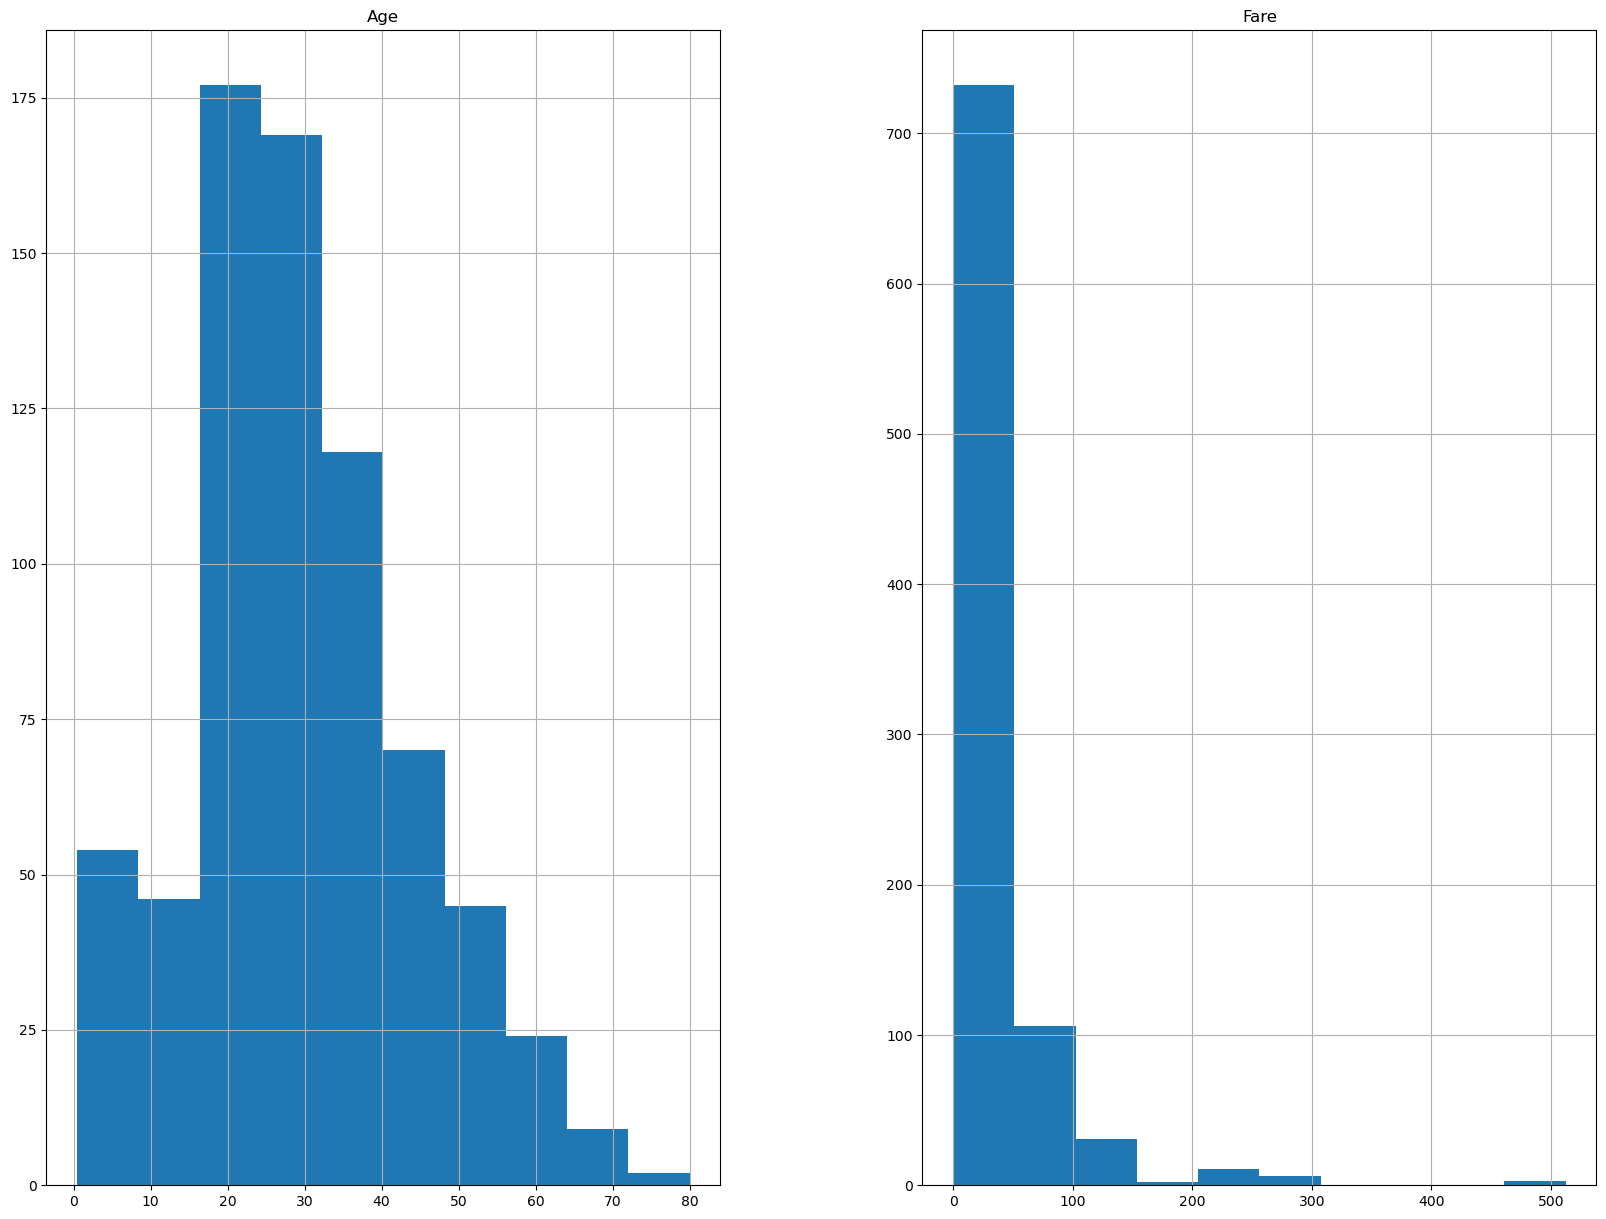

In [11]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [12]:
data['Age']= data['Age'].fillna(data['Age'].median())

In [13]:
for i in ['Cabin','Embarked']:
    data[i] = data[i].fillna(data[i].mode()[0])

In [14]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### 5.Handling Outliers

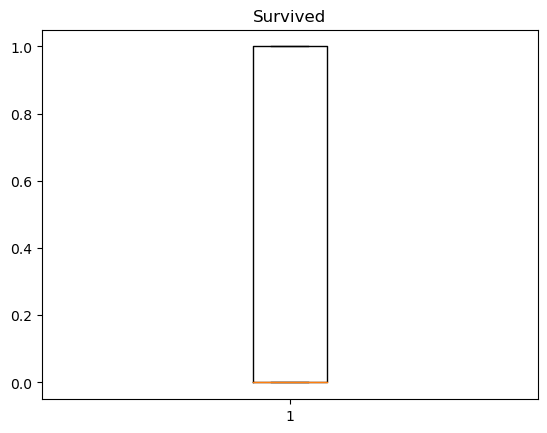

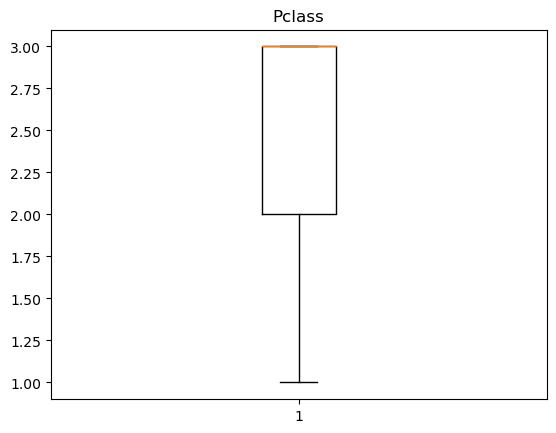

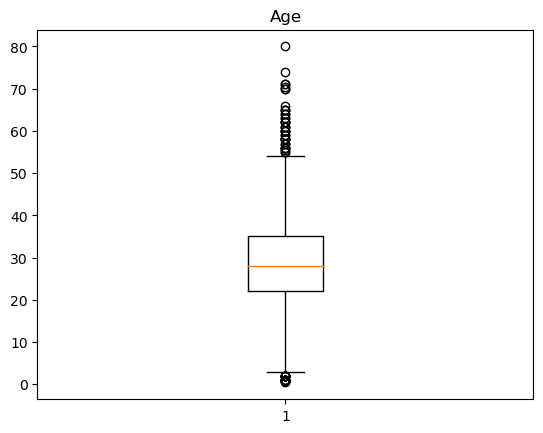

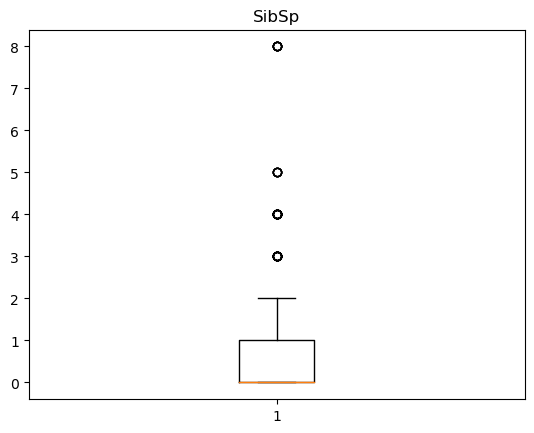

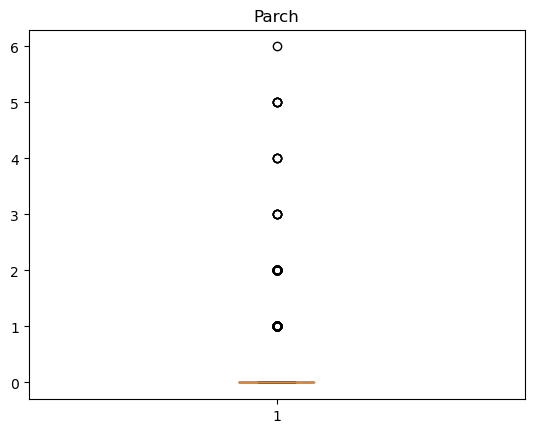

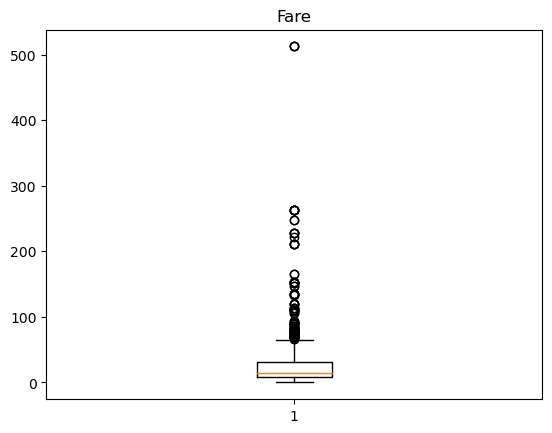

In [15]:
# To find Outliers

num_cols=['Survived','Pclass','Age','SibSp','Parch','Fare']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [24]:
# To replace outliers, we use flooring and capping.

In [16]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 -(1.5*IQR)
up_lim = Q3 +(1.5*IQR)
data['Age']=np.where(data['Age']>up_lim,up_lim,np.where(data['Age']<low_lim,low_lim,data['Age']))

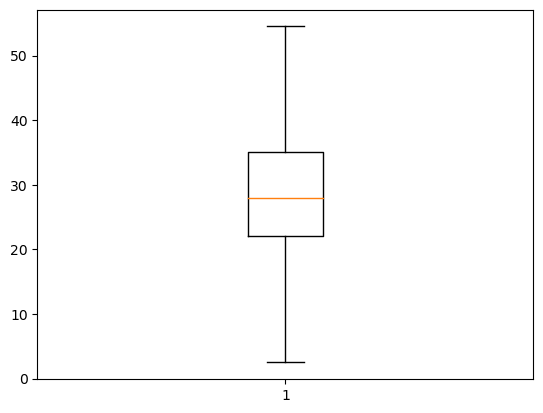

In [17]:
plt.boxplot(data['Age'])
plt.show()

In [18]:
Q1 = data['SibSp'].quantile(0.25)
Q3 = data['SibSp'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 -(1.5*IQR)
up_lim = Q3 +(1.5*IQR)
data['SibSp']=np.where(data['SibSp']>up_lim,up_lim,np.where(data['SibSp']<low_lim,low_lim,data['SibSp']))

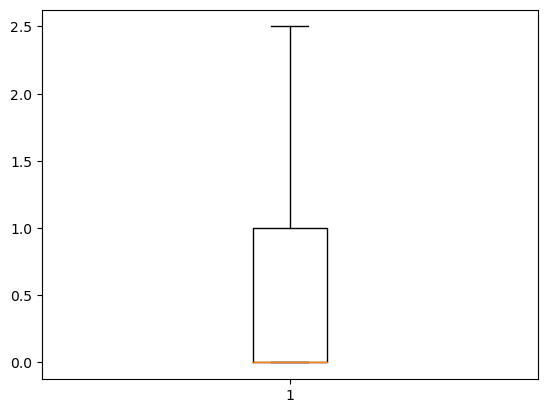

In [19]:
plt.boxplot(data['SibSp'])
plt.show()

In [20]:
Q1 = data['Parch'].quantile(0.25)
Q3 = data['Parch'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 -(1.5*IQR)
up_lim = Q3 +(1.5*IQR)
data['Parch']=np.where(data['Parch']>up_lim,up_lim,np.where(data['Parch']<low_lim,low_lim,data['Parch']))

<function matplotlib.pyplot.show(close=None, block=None)>

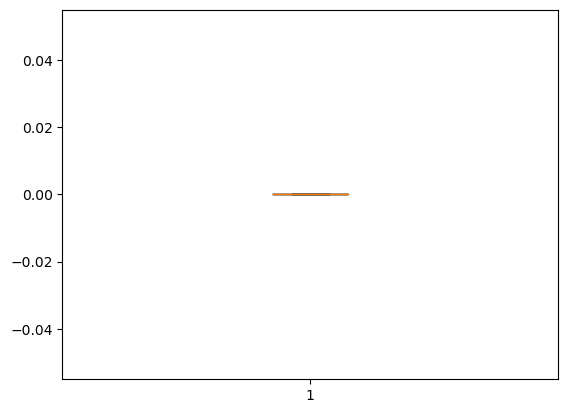

In [21]:
plt.boxplot(data['Parch'])
plt.show

In [22]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 -(1.5*IQR)
up_lim = Q3 +(1.5*IQR)
data['Fare']=np.where(data['Fare']>up_lim,up_lim,np.where(data['Fare']<low_lim,low_lim,data['Fare']))

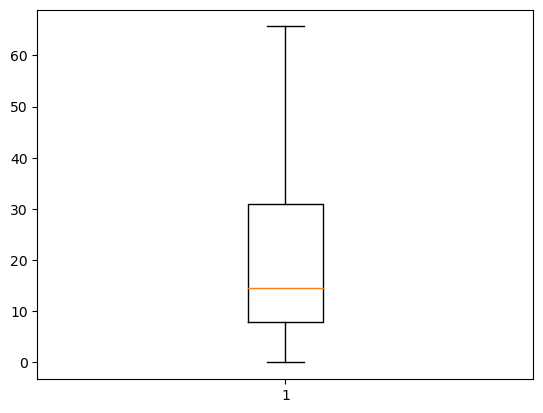

In [23]:
plt.boxplot(data['Fare'])
plt.show()

### 5.Min Max Scaling

In [25]:
X = data.drop('Survived',axis=1)   # features or independent variables
y = data['Survived']  # target or response or dependent variable

In [26]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.0,891.000000
mean,2.308642,29.039282,0.426487,0.0,24.046813
std,0.836071,12.072074,0.708246,0.0,20.481625
min,1.000000,2.500000,0.000000,0.0,0.000000
25%,2.000000,22.000000,0.000000,0.0,7.910400
50%,3.000000,28.000000,0.000000,0.0,14.454200
75%,3.000000,35.000000,1.000000,0.0,31.000000
max,3.000000,54.500000,2.500000,0.0,65.634400


In [27]:
X.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [31]:
X1 = X.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1)

In [32]:
X1.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1.0,0.0,7.2500
2,1,38.0,1.0,0.0,65.6344
3,3,26.0,0.0,0.0,7.9250
4,1,35.0,1.0,0.0,53.1000
5,3,35.0,0.0,0.0,8.0500


In [33]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X1 = min_max.fit_transform(X1)

In [34]:
X1 = pd.DataFrame(X1, columns=['Pclass','Age','SibSp','Parch','Fare'])

In [35]:
X1.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.0,891.000000
mean,0.654321,0.510371,0.170595,0.0,0.366375
std,0.418036,0.232155,0.283298,0.0,0.312056
min,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.500000,0.375000,0.000000,0.0,0.120522
50%,1.000000,0.490385,0.000000,0.0,0.220223
75%,1.000000,0.625000,0.400000,0.0,0.472313
max,1.000000,1.000000,1.000000,0.0,1.000000
